In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# ML + Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install category_encoders

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./ethereum-anomaly-detection-logisticregression.ipynb
./XGBoost.pkl
./model.pkl
./ethereum-anomaly-detection-XGBoost.ipynb
./transaction_dataset.csv
./.ipynb_checkpoints/transaction_dataset-checkpoint.csv
./.ipynb_checkpoints/ethereum-anomaly-detection-XGBoost-checkpoint.ipynb
./.ipynb_checkpoints/ethereum-anomaly-detection-logisticregression-checkpoint.ipynb


In [2]:
df = pd.read_csv("transaction_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [4]:
df.tail()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,9840,2179,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,1,37242.70,149.56,670817.33,18,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,,INS Promo1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [6]:
print(f"Number of rows in DataFrame is {df.shape[0]}")
print(f"Number of columns in DataFrame is {df.shape[1]}")

Number of rows in DataFrame is 9841
Number of columns in DataFrame is 51


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [8]:
print("Number of NaN values in each columns:\n\n", df.isnull().sum())

Number of NaN values in each columns:

 Unnamed: 0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                 

In [9]:
# Change the name of columns
df.columns = df.columns.str.strip().str.replace(r'\b\s+\b', '_', regex=True)
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg_min_between_sent_tnx',
       'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_be

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg_min_between_sent_tnx                              9841 non-null   float64
 5   Avg_min_between_received_tnx                          9841 non-null   float64
 6   Time_Diff_between_first_and_last (Mins)               9841 non-null   float64
 7   Sent_tnx                                              9841 non-null   int64  
 8   Received_Tnx                                          9841

In [11]:
# ============================
# 2. Feature Engineering
# ============================

# Target variable
y = df['FLAG']   # <-- replace 'Class' with your fraud label column

# Features (drop target + any unwanted columns)
X = df.drop(columns=['FLAG','Address','Unnamed: 0','Index'])  

In [12]:
# Identify categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", categorical_cols)

# One-hot encode categoricals
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Encoded Shape:", X_encoded.shape)

Categorical features: ['ERC20_most_sent_token_type', 'ERC20_most_rec_token_type']
Encoded Shape: (9841, 813)


In [13]:
X

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,...,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# ============================
# 3. Train/Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (7872, 813) Test size: (1969, 813)


In [15]:
# ============================
# 4. Train XGBoost Model
# ============================
# Handle class imbalance: scale_pos_weight = (negatives / positives)
# scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)


model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       0.99      1.00      1.00      1533
    Fraud (1)       1.00      0.98      0.99       436

     accuracy                           1.00      1969
    macro avg       1.00      0.99      0.99      1969
 weighted avg       1.00      1.00      1.00      1969



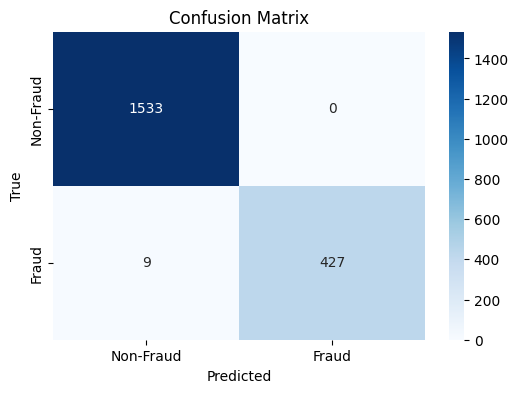

In [16]:
# ============================
# 5. Predictions & Evaluation
# ============================
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud','Fraud'], yticklabels=['Non-Fraud','Fraud'])
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

In [17]:
# ============================
# 6. Accuracy / False Positive / False Negative Rates
# ============================
false_positives = ((y_pred == 1) & (y_test == 0)).sum()
true_negatives = ((y_pred == 0) & (y_test == 0)).sum()
false_negatives = ((y_pred == 0) & (y_test == 1)).sum()
true_positives = ((y_pred == 1) & (y_test == 1)).sum()

# Metrics
fpr = false_positives / (false_positives + true_negatives) * 100
fnr = false_negatives / (false_negatives + true_positives) * 100
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives) * 100

# Print results
print(f"Overall Accuracy: {accuracy:.2f}%")
print(f"False Positive Rate: {fpr:.2f}%")
print(f"False Negative Rate: {fnr:.2f}%")

Overall Accuracy: 99.54%
False Positive Rate: 0.00%
False Negative Rate: 2.06%


<Figure size 1000x800 with 0 Axes>

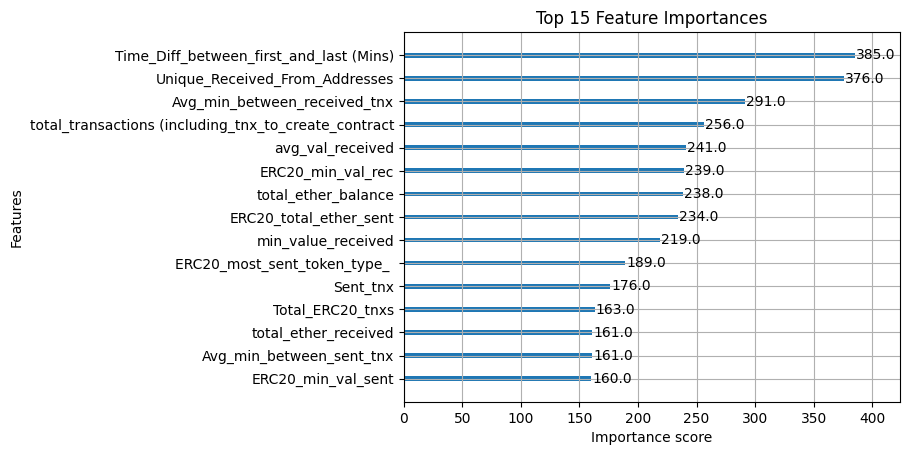

In [18]:
# ============================
# 7. Feature Importance
# ============================
plt.figure(figsize=(10,8))
plot_importance(model, max_num_features=15, importance_type="weight")  # 'weight' = frequency
plt.title("Top 15 Feature Importances")
plt.show()

In [19]:
# Test loop for first 200 samples in X_test
for i in range(1, 100):
    example_row = X_test.iloc[i].values.reshape(1, -1)  # Use raw features (no scaling needed)
    
    # Prediction (class label)
    prediction = model.predict(example_row)
    
    # Prediction probabilities
    prob = model.predict_proba(example_row)[0]
    
    # True label
    true_label = y_test.iloc[i]
    
    print(f"Index: {i}")
    print(f"Prediction: {'Fraud (1)' if prediction[0] == 1 else 'Non-Fraud (0)'}")
    print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
    print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
    print("\n")

Index: 1
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [1.0000, 0.0000]
True label (FLAG): 0 (1=fraud, 0=non-fraud)


Index: 2
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9997, 0.0003]
True label (FLAG): 0 (1=fraud, 0=non-fraud)


Index: 3
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [1.0000, 0.0000]
True label (FLAG): 0 (1=fraud, 0=non-fraud)


Index: 4
Prediction: Fraud (1)
Probability (Non-Fraud, Fraud): [0.4321, 0.5679]
True label (FLAG): 1 (1=fraud, 0=non-fraud)


Index: 5
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9999, 0.0001]
True label (FLAG): 0 (1=fraud, 0=non-fraud)


Index: 6
Prediction: Fraud (1)
Probability (Non-Fraud, Fraud): [0.0001, 0.9999]
True label (FLAG): 1 (1=fraud, 0=non-fraud)


Index: 7
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9999, 0.0001]
True label (FLAG): 0 (1=fraud, 0=non-fraud)


Index: 8
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9227, 0.0773]
True label (FL

In [20]:
# Show only misclassified cases in X_test
for i in range(len(X_test)):
    example_row = X_test.iloc[i].values.reshape(1, -1)
    
    # Prediction (class label)
    prediction = model.predict(example_row)
    
    # Prediction probabilities
    prob = model.predict_proba(example_row)[0]
    
    # True label
    true_label = y_test.iloc[i]
    
    # Only show mismatches
    if prediction[0] != true_label:
        print(f"Index: {i}")
        print(f"Prediction: {'Fraud (1)' if prediction[0] == 1 else 'Non-Fraud (0)'}")
        print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
        print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
        print("-" * 50)

Index: 180
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9974, 0.0026]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
--------------------------------------------------
Index: 468
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.5779, 0.4221]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
--------------------------------------------------
Index: 472
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9983, 0.0017]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
--------------------------------------------------
Index: 1083
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9637, 0.0363]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
--------------------------------------------------
Index: 1357
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.7796, 0.2204]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
--------------------------------------------------
Index: 1437
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.5998, 0.4002]
True l

In [24]:
# Ensure numeric input for both XGBoost and SHAP
X_train_num = X_train.copy()
X_test_num = X_test.copy()

# Convert object/categorical to numeric (if already one-hot encoded, just ensure dtype)
X_train_num = X_train_num.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
X_test_num = X_test_num.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

# Retrain model with numeric data
model.fit(X_train_num, y_train)

# SHAP Explainer
import shap
explainer = shap.TreeExplainer(model, X_train_num)

# Example explanation
example_row = X_test_num.iloc[[0]]
shap_values = explainer(example_row)

print("Feature contributions toward Fraud:")
shap_values_df = pd.DataFrame({
    "feature": X_test_num.columns,
    "contribution": shap_values.values[0]
}).sort_values(by="contribution", ascending=False)

print(shap_values_df.head(10))

Feature contributions toward Fraud:
                                               feature  contribution
48                        ERC20_most_sent_token_type_0      5.063462
22                                    Total_ERC20_tnxs      2.696964
27                                 ERC20_uniq_rec_addr      0.997213
350                        ERC20_most_rec_token_type_0      0.972707
2              Time_Diff_between_first_and_last (Mins)      0.779184
8                                   min_value_received      0.761077
10                                    avg_val_received      0.668606
21                                 total_ether_balance      0.474110
3                                             Sent_tnx      0.426012
17   total_transactions (including_tnx_to_create_co...      0.386732


In [26]:
# Predict once on test set
y_pred = model.predict(X_test_num)

# Loop through false predictions only
for i in range(len(X_test_num)):
    true_label = y_test.iloc[i]
    pred_label = y_pred[i]
    
    if true_label != pred_label:  # only misclassified
        example_row = X_test_num.iloc[[i]]
        shap_values = explainer(example_row)

        # SHAP values for fraud class (index 1)
        contrib = shap_values.values[0]

        # Sort by contributions pushing towards fraud (positive values)
        fraud_features = (
            pd.DataFrame({
                "feature": X_test_num.columns,
                "contribution": contrib
            })
            .sort_values(by="contribution", ascending=False)
        )

        # Prediction probabilities
        prob = model.predict_proba(example_row)[0]

        print(f"Index: {i}")
        print(f"Prediction: {'Fraud (1)' if pred_label == 1 else 'Non-Fraud (0)'}")
        print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
        print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
        print("Top fraud-driving features:")

        # Top 5 pushing toward Fraud (positive SHAP values)
        top_fraud = fraud_features.sort_values(by="contribution", ascending=False).head(5)

        # Top 5 pushing toward Non-Fraud (negative SHAP values)
        top_nonfraud = fraud_features.sort_values(by="contribution", ascending=True).head(5)

        # print(fraud_features.head(10))  # show top 5

        print(top_fraud)
        print("       -------------------------------")
        print(top_nonfraud)
        
        print("--------------------------------------------------")
        print("\n")

Index: 4
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.5568, 0.4432]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
Top fraud-driving features:
                         feature  contribution
48  ERC20_most_sent_token_type_0      3.135255
24        ERC20_total_ether_sent      1.269269
38            ERC20_max_val_sent      1.215094
10              avg_val_received      0.978235
35             ERC20_max_val_rec      0.645488
       -------------------------------
                         feature  contribution
22              Total_ERC20_tnxs     -2.024435
45  ERC20_most_sent_token_type_      -1.043526
1   Avg_min_between_received_tnx     -0.752307
27           ERC20_uniq_rec_addr     -0.608532
3                       Sent_tnx     -0.423095
--------------------------------------------------


Index: 180
Prediction: Non-Fraud (0)
Probability (Non-Fraud, Fraud): [0.9882, 0.0118]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
Top fraud-driving features:
                            fe

In [27]:
# Loop over first 100 samples (you can adjust)
for i in range(0, 100):
    example_row = X_test_num.iloc[[i]]
    
    # Predictions
    prediction = model.predict(example_row)[0]
    prob = model.predict_proba(example_row)[0]
    true_label = y_test.iloc[i]
    
    # SHAP values for this row
    shap_values = explainer(example_row)
    contrib = shap_values.values[0]

    # Rank features by fraud contribution (positive values push toward Fraud)
    fraud_features = (
        pd.DataFrame({
            "feature": X_test_num.columns,
            "contribution": contrib
        })
        .sort_values(by="contribution", ascending=False)
    )

    # Display results
    print(f"Index: {i}")
    print(f"Prediction: {'Fraud (1)' if prediction == 1 else 'Non-Fraud (0)'}")
    print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
    print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
    print("Top fraud-driving features:")
    # print(fraud_features.head(5))   # show top 5 contributions
    # Top 5 pushing toward Fraud (positive SHAP values)
    top_fraud = fraud_features.sort_values(by="contribution", ascending=False).head(5)

    # Top 5 pushing toward Non-Fraud (negative SHAP values)
    top_nonfraud = fraud_features.sort_values(by="contribution", ascending=True).head(5)

    # print(fraud_features.head(10))  # show top 5

    print(top_fraud)
    print("       -------------------------------")
    print(top_nonfraud)
    print("--------------------------------------------------")
    print("\n")

Index: 0
Prediction: Fraud (1)
Probability (Non-Fraud, Fraud): [0.0002, 0.9998]
True label (FLAG): 1 (1=fraud, 0=non-fraud)
Top fraud-driving features:
                                     feature  contribution
48              ERC20_most_sent_token_type_0      5.063462
22                          Total_ERC20_tnxs      2.696964
27                       ERC20_uniq_rec_addr      0.997213
350              ERC20_most_rec_token_type_0      0.972707
2    Time_Diff_between_first_and_last (Mins)      0.779184
       -------------------------------
                                             feature  contribution
45                      ERC20_most_sent_token_type_      -0.679915
6                     Unique_Received_From_Addresses     -0.639642
421  ERC20_most_rec_token_type_Blockwell say NOTSAFU     -0.059598
11                                      min_val_sent     -0.035078
0                           Avg_min_between_sent_tnx     -0.033811
--------------------------------------------------




In [28]:
import pickle
pickle.dump(model,open('XGBoost.pkl','wb'))

In [32]:
model = pickle.load(open('XGBoost.pkl','rb'))
example_row = X_test_num.iloc[[100]]
prediction = model.predict(example_row)[0]
print(prediction)

0


In [ ]:
X_test.iloc[180]

In [ ]:
X_test

In [ ]:
# # Test loop for indices 500-700
# i=0
# example_row_scaled = X_test_scaled[i].reshape(1, -1)  # Use scaled features
# prediction = lr_model.predict(example_row_scaled)
# prob = lr_model.predict_proba(example_row_scaled)[0]  # Probability of each class
# true_label = y_test.iloc[i]
# print(f"Index: {i}")
# print(f"Prediction: {'Fraud (1)' if prediction[0] == 1 else 'Non-Fraud (0)'}")
# print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
# print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
# print("\n")

In [ ]:
# # Test loop for indices 500-700
# for i in range(1,200):
#     example_row_scaled = X_test_scaled[i].reshape(1, -1)  # Use scaled features
#     prediction = lr_model.predict(example_row_scaled)
#     prob = lr_model.predict_proba(example_row_scaled)[0]  # Probability of each class
#     true_label = y_test.iloc[i]
#     print(f"Index: {i}")
#     print(f"Prediction: {'Fraud (1)' if prediction[0] == 1 else 'Non-Fraud (0)'}")
#     print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
#     print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
#     print("\n")

In [ ]:
# # Use column names from X (before scaling)
# feature_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': lr_model.coef_[0]
# }).sort_values('Coefficient', key=abs, ascending=False)

# print("Top 10 Feature Importances:")
# print(feature_importance.head(10))

In [ ]:
# X_test.iloc[0]
# X_test_scaled

In [ ]:
# Test loop for indices 500-700
# i=0
# example_row_scaled = X_test_scaled[i].reshape(1, -1)  # Use scaled features
# prediction = lr_model.predict(example_row_scaled)
# prob = lr_model.predict_proba(example_row_scaled)[0]  # Probability of each class
# true_label = y_test.iloc[i]
# print(f"Index: {i}")
# print(f"Prediction: {'Fraud (1)' if prediction[0] == 1 else 'Non-Fraud (0)'}")
# print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
# print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
# print("\n")

# # Feature importance (coefficients)
# feature_importance = pd.DataFrame({
#     'Feature': X_train_encoded.columns,
#     'Coefficient': lr_model.coef_[0]
# }).sort_values('Coefficient', key=abs, ascending=False)
# print("Top 10 Feature Importances:")
# print(feature_importance)

In [ ]:
# Test loop for indices 500-700
# for i in range(1000,1010):
#     example_row_scaled = X_test_scaled[i].reshape(1, -1)  # Use scaled features
#     prediction = lr_model.predict(example_row_scaled)
#     prob = lr_model.predict_proba(example_row_scaled)[0]  # Probability of each class
#     true_label = y_test.iloc[i]
#     print(f"Index: {i}")
#     print(f"Prediction: {'Fraud (1)' if prediction[0] == 1 else 'Non-Fraud (0)'}")
#     print(f"Probability (Non-Fraud, Fraud): [{prob[0]:.4f}, {prob[1]:.4f}]")
#     print(f"True label (FLAG): {true_label} (1=fraud, 0=non-fraud)")
#     print("\n")

# # Feature importance (coefficients)
# feature_importance = pd.DataFrame({
#     'Feature': X_train_encoded.columns,
#     'Coefficient': lr_model.coef_[0]
# }).sort_values('Coefficient', key=abs, ascending=False)
# print("Top 10 Feature Importances:")
# print(feature_importance)